In [148]:
import numpy as np
from plind.plmodel import plmodel
from plind.contour_dict import realcontour_nd
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from plind_tests.gaussian import Gaussian
from plind.integrate import conintegrate

%load_ext autoreload
%load_ext line_profiler
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [149]:
testfunction = Gaussian(2)


In [150]:
# init model
delta = 0.4
Nstep = 150
dt_init = 8e-3
thresh =-10
tmax = dt_init*400

#%lprun -f realcontour_nd realcontour_nd(5, (-0.5,0.5,-0.5,0.5))

contour = realcontour_nd(10, (-0.5,0.5,-0.5,0.5))


plind = plmodel(contour, testfunction.expfun, grad=testfunction.gradh, expargs=testfunction.expargs)


In [151]:
#%lprun -f plind.descend plind.descend(delta, thresh, tmax, dt_init)
plind.descend(delta, thresh, tmax, dt_init)

/Users/DylanJow/plind/plind/descend/core.py:40: RuntimeWarning: divide by zero encountered in true_divide
  delta = np.min((np.divide(tol,2*R))**(1/4))


total steps: 37 current time: 3.28094031689736


In [152]:
#%lprun -f plind.contour.refine_edges plind.contour.refine_edges(delta/10)
plind.contour.refine_edges(delta/10)

In [153]:
plind.integrate()
print('integral = ', plind.integral[0], '+-', plind.integral[1])
print('true value =', testfunction.integral(*testfunction.expargs))
print('error =', np.abs(np.imag(testfunction.integral(*testfunction.expargs))/np.imag(plind.integral[0])-1))

total steps: 3 current time: 0.23371855707306488
integral =  (2.0898543421017585e-08+3.1411508928706837j) +- 0.0008835208008913809
true value = 3.141592653589793j
error = 0.00014063658008667268


/Users/DylanJow/plind/plind/descend/core.py:40: RuntimeWarning: divide by zero encountered in true_divide
  delta = np.min((np.divide(tol,2*R))**(1/4))


In [145]:
plind.delta

0.4

In [146]:
int0 = plind.integral[0]

plind.descend(plind.delta, 10*plind.thresh, 2*plind.dt, plind.dt)
plind.integrate()
int1 = plind.integral[0]

total steps: 3 current time: 0.23371855707306488


/Users/DylanJow/plind/plind/descend/core.py:40: RuntimeWarning: divide by zero encountered in true_divide
  delta = np.min((np.divide(tol,2*R))**(1/4))


In [147]:
np.abs((int0-int1))

0.00044176040044569047

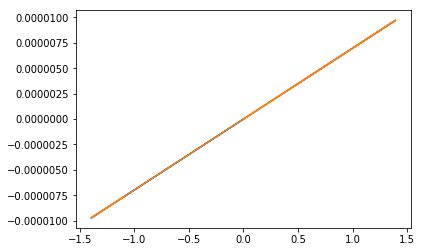

In [104]:
plt.figure()
plt.plot(np.real(plind.contour.points[:,0]), (np.real(plind.contour.points[:,0])-np.imag(plind.contour.points[:,0])))
plt.plot(np.real(plind.contour.points[:,1]), (np.real(plind.contour.points[:,1])-np.imag(plind.contour.points[:,1])))
plt.show()

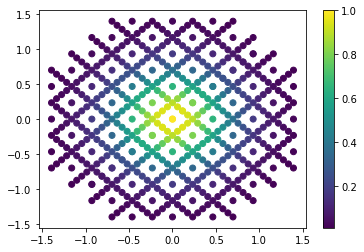

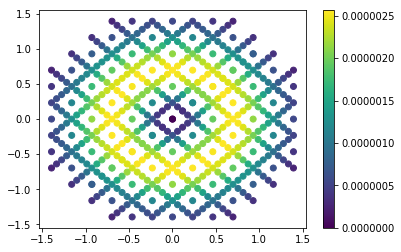

In [105]:
intfun = plind.get_intfun()
xs = np.real(plind.contour.points[:,0])
ys = np.real(plind.contour.points[:,1])


intvals = np.array([intfun(p, 2) for p in plind.contour.points])
#triang = mtri.Triangulation(xs,ys,plind.contour.simplices)

plt.figure()
plt.scatter(xs, ys, c=intvals.real)
#plt.triplot(triang, alpha=0.8)
plt.colorbar()
plt.show()


plt.figure()
plt.scatter(xs, ys, c=intvals.imag)
plt.colorbar()
plt.show()



In [106]:
# Plot integral over trajectory
integrals = []
for contour in plind.trajectory:
    integrals.append(conintegrate(plind.intfun, contour, args=plind.expargs)[0])
integrals = np.array(integrals)
r = np.abs((np.abs(integrals/np.roll(integrals, 1)))[1:]-1)

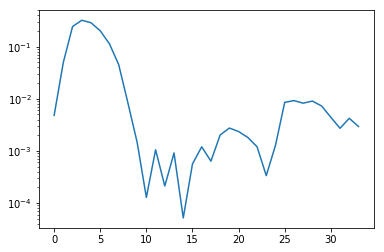

In [107]:
fig, ax = plt.subplots()
ax.plot(r)
ax.set_yscale('log')
plt.show()